## Интеллектуальный анализ данных – весна 2023
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [112]:
print(X.isnull().sum().sum())
#пропущенных нет
cols = X.columns
num_cols = X._get_numeric_data().columns
cat = list(set(cols) - set(num_cols))
print(cat)
#все числовые

0
[]


**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [9]:
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
X = data.data[:, [0, 4]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
neighbors = [1, 3, 5, 10, 15, 25]
results = []
clfs = []
for k in neighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    clf.fit(X_train, y_train)
    train_pred = clf.predict(X_train)
    test_pred = clf.predict(X_test)
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    results.append([k, train_acc, test_acc])
    clfs.append(clf)
results_df = pd.DataFrame(results, columns=['NN', 'Train', 'Test'])
print(results_df)

   NN     Train      Test
0   1  0.991935  0.666667
1   3  0.838710  0.666667
2   5  0.806452  0.685185
3  10  0.790323  0.703704
4  15  0.774194  0.703704
5  25  0.725806  0.703704


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [10]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [11]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

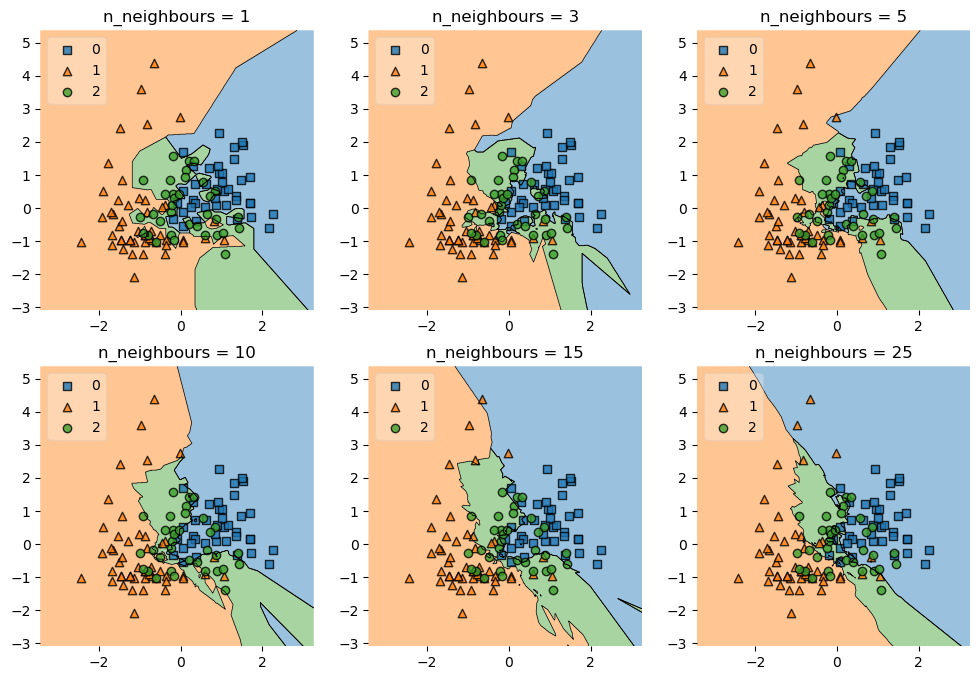

In [110]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
import warnings
warnings.filterwarnings('ignore')
gs = gridspec.GridSpec(2, 3)
fig = np.array(plt.figure(figsize=(12,8)))
labels = ['n_neighbours = 1', 'n_neighbours = 3', 'n_neighbours = 5', 'n_neighbours = 10', 'n_neighbours = 15', 'n_neighbours = 25']
for clf, lab, grd in zip(clfs, labels, itertools.product([0, 1, 2], repeat=2)):
    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=y_train, clf=clf, legend=2)
    plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

In [ ]:
При 1 соседе модель заметно переобучается, это видно и по тренировочной выбоорке 1.3 и на графике,  так как области слишком фигуристые и ломанные. По результатам 1.3 лучше всего справляются 10, 15 и 25 соседей, но по графикам из 1.5 кажестя, что лучше справилась только 15, так как области вполне плавные, но и под скопление синих точек модель подстроилась ( 25 соседей слишком плавно разделило области и не подстроилась в нужной степени под скопление синих точек). 

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

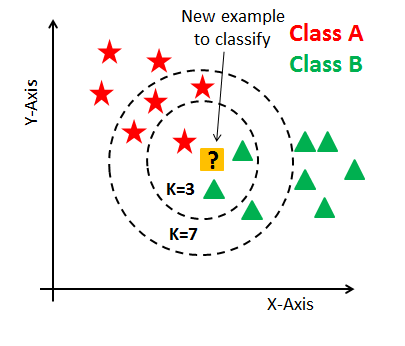

In [113]:
import numpy as np
from collections import Counter 

class KNN:
    def __init__(self, k:int):
        self.k = k
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        pass
    
    def predict(self, X):
        y_pred = []
        for i in range(len(X)):
            distances = np.sqrt(np.sum((self.X_train - X[i])**2, axis=1))
            nearest_indices = np.argsort(distances)[:self.k]
            nearest_labels = self.y_train[nearest_indices]
            y_pred.append(np.bincount(nearest_labels).argmax())
        return np.array(y_pred)

In [114]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [115]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [117]:
#data = pd.read_csv('data/diamonds.csv') заменила на другой путь
data = pd.read_csv('https://raw.githubusercontent.com/katiebagau/data/main/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [118]:
print(data.isnull().sum().sum()) #пропусков нет, удалять нечего

0


**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [120]:
#бессмысленный признак Индекс, потому удалим его
#data = data.drop(data.columns[0], axis=1) #закоментила, чтобы случайно не удалить еще раз
data.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [121]:
data.corr() #сильная корреляция между ценой и каратами, х, у, z

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [122]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore') 
encoder_cut = pd.DataFrame(encoder.fit_transform(data[['cut']]).toarray())
encoder_color = pd.DataFrame(encoder.fit_transform(data[['color']]).toarray())
encoder_clarity = pd.DataFrame(encoder.fit_transform(data[['clarity']]).toarray())
data = data.join(encoder_cut, how = 'left', lsuffix='left', rsuffix='right')
data = data.join(encoder_color, how = 'left', lsuffix='left', rsuffix='right')
data = data.join(encoder_clarity, how = 'left', lsuffix='left')
data = data.drop('cut', axis=1)
data = data.drop('color', axis=1)
data = data.drop('clarity', axis=1)
data.columns = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'fair cut', 'good cut', 'ideal cut', 'premium cut', 'very good cut', '0 color', '1 color', '2 color', '3 color', '4 color', '5 color', '6 color' , ' 0 clarity', ' 1 clarity', ' 2 clarity', ' 3 clarity', ' 4 clarity', ' 5 clarity', ' 6 clarity', ' 7 clarity']
data.head(20)

,carat,depth,table,price,x,y,z,fair cut,good cut,ideal cut,...,5 color,6 color,0 clarity,1 clarity,2 clarity,3 clarity,4 clarity,5 clarity,6 clarity,7 clarity
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.24,62.8,57.0,336,3.94,3.96,2.48,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.24,62.3,57.0,336,3.95,3.98,2.47,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.26,61.9,55.0,337,4.07,4.11,2.53,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.22,65.1,61.0,337,3.87,3.78,2.49,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.23,59.4,61.0,338,4.00,4.05,2.39,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [123]:
from sklearn.model_selection import train_test_split

X = data[data.columns.difference(['price'])]
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [124]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [125]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_test_pred = model.predict(X_test_scaled)
mse_test = mean_squared_error(y_test, y_test_pred)
y_train_pred = model.predict(X_train_scaled)
mse_train = mean_squared_error(y_train, y_train_pred)
train_score=model.score(X_train_scaled, y_train)
test_score=model.score(X_test_scaled, y_test)
print('mse_train -', mse_train, 'mse_test -' ,mse_test)
print('train_score -', train_score, 'test_score -', test_score)

mse_train - 1290585.5333899956 mse_test - 1244787.3398717758
train_score - 0.9195949093026922 test_score - 0.9201852869628295


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [146]:
colnames = pd.DataFrame(X_train.columns)
coeffs = pd.DataFrame(model.coef_)
namesandcoeffs = colnames.join(coeffs, how = 'left', lsuffix='left')
namesandcoeffs.columns = ['name', 'coeff']
print(namesandcoeffs) 
#переменные, которые на порядок выше других : все переменнные clarity, все переменные color, все переменные cut

             name         coeff
0       0 clarity  2.152243e+13
1       1 clarity  3.323624e+13
2       2 clarity  7.985977e+13
3       3 clarity  6.969655e+13
4       4 clarity  6.666884e+13
5       5 clarity  7.792187e+13
6       6 clarity  4.682335e+13
7       7 clarity  5.401909e+13
8         0 color -3.886372e+14
9         1 color -4.526628e+14
10        2 color -4.493680e+14
11        3 color -4.764017e+14
12        4 color -4.257779e+14
13        5 color -3.523374e+14
14        6 color -2.610735e+14
15          carat  5.336649e+03
16          depth -9.050300e+01
17       fair cut -7.673810e+14
18       good cut -1.294111e+15
19      ideal cut -2.212069e+15
20    premium cut -1.970321e+15
21          table -6.031579e+01
22  very good cut -1.887967e+15
23              x -1.099621e+03
24              y -6.955724e+00
25              z -3.330655e+01


**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [105]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
lasso = Lasso(alpha=10)
lasso.fit(X_train_scaled,y_train)
lasso_train_score = lasso.score(X_train_scaled,y_train)
ridge = Ridge(alpha=10) 
ridge.fit(X_train_scaled, y_train)
Ridge_train_score = ridge.score(X_train_scaled,y_train)
print(lasso_train_score, Ridge_train_score)
print('Lasso-веса:', lasso.coef_) #веса для Lasso-регрессии
print('Ridge-веса:', ridge.coef_) #веса для Ridge-регрессии
#Лассо обнулила некоторые не столь важные показатели, остальные сильно уменьшила. В изначальной регрессии коэффициенты были даже 16-значными, теперь они не превосходят 5000 по модулю. То есть у нас была очень сильная мультиколлинеарность.
#Такой же вывод можно сделать и при рассмотрении Риджа. Хоть коэффициенты и не обнулялись, они все сильно упали и нее превосходят 5500 по модулю

0.9188930252911823 0.9195935964193938
Lasso-веса: [-488.71761859  194.0558346  -252.33683689 -573.62812572  101.29740778
   -0.          187.50385089  194.00060747  147.94850665   92.66363631
   69.13868189   -0.         -172.35282949 -279.0062384  -403.02079084
 4872.01144012  -57.06130002 -126.53281256  -42.81379624   41.76414024
    0.          -47.6355534    -0.         -652.01925945   -0.
  -43.26039169]
Ridge-веса: [-4.73321397e+02  2.44575156e+02 -1.47096586e+02 -4.91313752e+02
  2.02359351e+02  1.02000447e+02  2.54446988e+02  2.72034475e+02
  2.11055842e+02  1.62246931e+02  1.39296135e+02  5.59072865e+01
 -1.30202420e+02 -2.50581034e+02 -3.86751101e+02  5.30128906e+03
 -8.76398047e+01 -1.25880000e+02 -4.14803547e+01  5.19690360e+01
  1.64495454e+01 -6.01236861e+01  1.54033130e+00 -1.05722889e+03
 -9.60514861e+00 -3.80715442e+01]


**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

[5554.398324214366, 7818.610014788999, 9293.91110080528, 10107.876009663136, 10746.987272003666, 11794.5884256126, 12756.4453055928, 13650.69513026961, 14489.86053226712, 15283.017992187872]


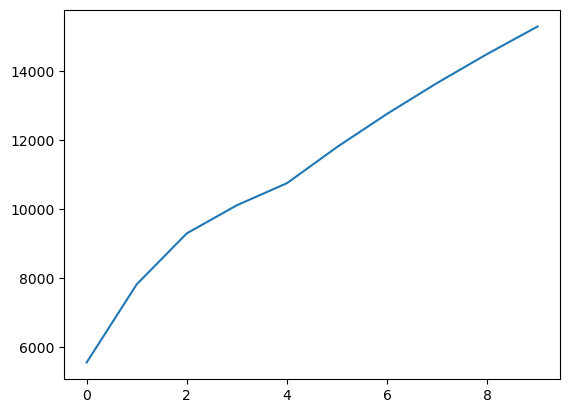

In [97]:
import matplotlib.pyplot as plt
reg = [0.1, 1, 10, 100, 200]
coeff=[]
linalg = []
for i in reg:
    lasso = Lasso(i).fit(X_train_scaled, y_train)
    coeff.append(lasso.coef_)
    linalg.append(np.linalg.norm (coeff))
for j in reg:
    ridge = Ridge(i).fit(X_train_scaled, y_train)
    coeff.append(ridge.coef_)
    linalg.append(np.linalg.norm (coeff))
print(linalg)
plt.plot(linalg)
plt.show()
#лассо-регрессия часто обнуляет признаки, что агрессивнее, чем ридж-регрессия, так как она лишь уменьшает вес большинства из них в модели. Лассо оставляет только самые важные и значимые признаки, потому с ее помощью удобно производить отбор.

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [103]:
from numpy import arange
from sklearn. linear_model import LassoCV
model = LassoCV(alphas= reg, cv=5)
model.fit(X_train_scaled, y_train)
print(model.mse_path_)
print(model.alphas_)
print(model.alpha_)  #с помощью этой строки выведем оптимальное альфа (ну и по матрице оно же имеет наименьшие ошибки)

[[2029524.03246354 1995236.55340605 1973348.93734339 1915154.44988516
  1932274.78643897]
 [1597114.34459248 1570719.54122982 1560557.19160085 1497284.47954781
  1505727.45889484]
 [1345058.69907484 1310749.1239297  1333702.71245618 1270244.1432856
  1262213.81527301]
 [1333940.38860351 1294014.6359287  1335270.8569287  1259143.52306365
  1246034.96854081]
 [1333812.63780816 1293210.11207306 1346722.0206061  1258966.77147279
  1245288.85085849]]
[2.e+02 1.e+02 1.e+01 1.e+00 1.e-01]
1.0


**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [149]:
lassofinal = Lasso(1).fit(X_train_scaled, y_train)
names = pd.DataFrame(X_train.columns)
lascoeffs = pd.DataFrame(lassofinal.coef_)
n_and_c = names.join(lascoeffs, how = 'left', lsuffix='left')
n_and_c.columns = ['name', 'coeff']
print(n_and_c)
#самыми информативными коэффициентами оказались 0 clarity, 3 clarity, carat, x
#самые неинформативные - 5 clarity, 3 color, premium cut, y
#Почему длина бриллианта так значимо взияет на цена, а ширина бриллианта нет, я не очень понимаю, но думаю, что эти параметры легко переходят друг в друга. X понятно почему влияет - это размер камня, также как и carat
#Думаю, что premium cut слабо влияло на цену и без того дорогих камней (это конечно премиально и дорого, но не так значимо в общей стоимости, потому что премиальная огранка будет только у самых дорогих необработанных камней)
#скорее всего аналогичная сситуация и с 5 clarity, 3 color (самые дешевые характеристики для самых дешевых камней, тк минус), главное, чтобы их вклад в цену был незначительным.
#0 clarity, 3 clarity возможно какие-то знаковые харакеристики (судя по знаку они плохие), которые частот встречаются у обычных камней и этим портят им цену (к примеру, обычный или даже очень хороший камень, но абсолютно мутный или мутный с каким-то дефектом)

             name        coeff
0       0 clarity  -500.715713
1       1 clarity   200.050729
2       2 clarity  -251.415432
3       3 clarity  -581.969691
4       4 clarity   113.841318
5       5 clarity    -0.000000
6       6 clarity   192.118632
7       7 clarity   200.297120
8         0 color   164.119035
9         1 color   107.852800
10        2 color    85.354118
11        3 color    -0.000000
12        4 color  -179.597731
13        5 color  -291.185067
14        6 color  -416.624468
15          carat  5292.362507
16          depth   -86.841586
17       fair cut  -131.509397
18       good cut   -51.209023
19      ideal cut    34.458842
20    premium cut     0.000000
21          table   -59.033138
22  very good cut   -12.731600
23              x -1057.145634
24              y    -4.230364
25              z   -35.457104


**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [111]:
y_test_pred = lassofinal.predict(X_test_scaled)
lassofinal_test_score = lassofinal.score(X_test_scaled,y_test)
mse_test = mean_squared_error(y_test, y_test_pred)
print(lassofinal_test_score)
print(mse_test)
#оптимальней использовать модель из 3.7, так как она лучше справилась с задачей, что видно по mse и test_score
#возможно, у нас получились такие результаты, потому что лассо обнулило слишком много показателей, а остальные слишком сильно подогнала под ограничение лямбда. 
#ещ еесть вероятность, что на цену влияет взаимодействие нескольких факторов, то есть цену не всегда возможно определить с нужной точностью, если исключить из выборки некоторые признаки. 

0.920180011793152
1244869.611224768
